#  Создание и настройка нейронной сети при помощи пакета `torch`

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann
* https://pytorch.org/docs/stable/nn.html
* https://pytorch.org/docs/stable/optim.html
* https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html
* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html
* https://pytorch.org/tutorials/recipes/recipes/tensorboard_with_pytorch.html
* https://pytorch.org/tutorials/intermediate/tensorboard_tutorial.html
* https://saturncloud.io/blog/can-i-use-tensorboard-with-google-colab/

## Задачи для совместного разбора

1\. Используя собственную реализацию нейрона и пакетного градиентного спуска, решите задачу регрессии. Для расчета градиентов воспользуйтесь возможностями по автоматическому дифференцированию `torch`. В качестве функции потерь используйте собственную реализацию MSE.

In [ ]:
from sklearn.datasets import make_regression
import torch as th

X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5, random_state=42)
X = th.FloatTensor(X)
y = th.FloatTensor(y)

In [ ]:
class Neuron:
  def __init__(self, n_inputs, rg=False):
    self.weights = th.normal(0, 1, size=(n_inputs, 1), requires_grad=rg)
    self.bias = th.normal(0, 1, size=(1, ), requires_grad=rg)

  def forward(self, inputs): # <реализовать логику нейрона>
    return inputs @ self.weights + self.bias

  # def backward(self, inputs, dldy):
  #   self.dw = dldy * inputs
  #   self.db = dldy

class Loss:
  def forward(self, y_pred, y_true):
    self.loss_ = ((y_pred - y_true)**2)
    return ((y_pred - y_true).pow(2)).mean()

  # def backward(self, y_pred, y_true): # dL/dy~
  #   self.dpred = 2 * (y_pred - y_true)

In [ ]:
n_epochs = 100
neuron = Neuron(4, rg=True)
crit = Loss()
gamma = 0.01

for epoch in range(n_epochs):
  # 1/ forward pass
  out = neuron.forward(X).flatten()
  loss = crit.forward(out, y)
  # backprop
  loss.backward()
  #
  with th.no_grad():
    neuron.weights -= gamma * neuron.weights.grad
    neuron.bias -= gamma * neuron.bias.grad
  # neuron.weights.data -= gamma * neuron.weights.grad
  # neuron.bias.data -= gamma * neuron.bias.grad
   #4.
  neuron.weights.grad.zero_()
  neuron.bias.grad.zero_()
  print(f"epoch={epoch}, loss={loss.item()}")
  break

epoch=0, loss=9402.119140625


In [ ]:
out.shape

torch.Size([100])

In [ ]:
# loss.backward()
# neuron.weights.grad

2\. Используя реализацию нейрона из `torch.nn`, решите задачу регрессии. Для расчета градиентов воспользуйтесь возможностями по автоматическому дифференцированию `torch`. В качестве функции потерь используйте собственную реализацию MSE. Для настройки весов реализуйте пакетный градиентный спуск с использованием `torch.optim`.

In [ ]:
import torch.nn as nn
import torch.optim as optim

In [ ]:
n_epochs = 100
neuron = nn.Linear(in_features=4, out_features=1)
crit = nn.MSELoss()
gamma = 0.01
optimizer = optim.SGD(neuron.parameters(), lr=gamma)

for epoch in range(n_epochs):
  # 1/ forward pass
  out = neuron(X).flatten()
  loss = crit(out, y)
  # 2. backprop
  loss.backward()
  # 3. grad descent
  optimizer.step()
   # 4. zero grad
  optimizer.zero_grad()

  print(f"epoch={epoch}, loss={loss.item()}")
  break

epoch=0, loss=9619.228515625


3\. Добавьте визуализацию изменения значения функции потерь во время обучения, используя `tensorboard`.

In [ ]:
from sklearn.datasets import make_classification
import torch as th

X, y = make_classification()
X = th.FloatTensor(X)
y = th.FloatTensor(y).long()

In [ ]:
X.shape

torch.Size([100, 20])

In [ ]:
y.unique()

tensor([0, 1])

In [ ]:
n_epochs = 100
neuron = nn.Linear(in_features=20, out_features=len(y.unique()))
crit = nn.CrossEntropyLoss()
gamma = 0.01
optimizer = optim.SGD(neuron.parameters(), lr=gamma)

for epoch in range(n_epochs):
  # 1/ forward pass
  out = neuron(X)
  loss = crit(out, y)
  # 2. backprop
  loss.backward()
  # 3. grad descent
  optimizer.step()
   # 4. zero grad
  optimizer.zero_grad()

  print(f"epoch={epoch}, loss={loss.item()}")
  break

epoch=0, loss=0.7683039903640747


In [ ]:
#%load_ext tensorboard

In [ ]:
#%tensorboard --logdir logs

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Используя собственную реализацию полносвязного слоя и мини-пакетного градиентного спуска, решите задачу регрессии. Для расчета градиентов воспользуйтесь возможностями по автоматическому дифференцированию `torch`. В качестве функции потерь используйте собственную реализацию MSE.

Предлагаемая архитектура нейронной сети:
1. Полносвязный слой с 10 нейронами
2. Активация ReLU
3. Полносвязный слой с 1 нейроном

- [ ] Проверено на семинаре

In [ ]:
import torch

X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * torch.pi * X) + 0.1 * torch.rand(X.size())

In [ ]:
class Linear:
    def __init__(self, n_neurons, n_features, rg=False):
        self.weights = torch.normal(0, 1, size=(n_features, n_neurons), requires_grad=rg)
        self.bias = th.normal(0, 1, size=(1, n_features), requires_grad=rg)

    def forward(self, inputs):
        res = inputs @ self.weights + self.bias
        return res

In [ ]:
class ReLU:
  def forward(self, inputs):
    return th.clip(inputs, min=0)

In [ ]:
class MSELoss:
  def forward(self, y_pred, y_true):
    self.loss = ((y_pred - y_true) ** 2).mean()
    return self.loss

In [ ]:
lin1 = Linear(n_neurons=10, n_features=1)
relu = ReLU()
lin2 =  Linear(n_neurons=1, n_features=10)
crit = MSELoss()

In [ ]:
lin1 = Linear(n_neurons=10, n_features=1, rg=True)
relu = ReLU()
lin2 =  Linear(n_neurons=1, n_features=10, rg=True)
crit = MSELoss()
gamma = 0.01
part = 50

for epoch in range(n_epochs):
  out = lin1.forward(X[:part])
  out = relu.forward(out)
  out = lin2.forward(out).flatten()
  loss = crit.forward(out, y[:part])
  loss.backward()
  with th.no_grad():
    lin2.weights -= gamma * lin2.weights.grad
    lin2.bias -= gamma * lin2.bias.grad
    lin1.weights -= gamma * lin1.weights.grad
    lin1.bias -= gamma * lin1.bias.grad
  lin2.weights.grad.zero_()
  lin2.bias.grad.zero_()
  lin1.weights.grad.zero_()
  lin1.bias.grad.zero_()

<p class="task" id="2"></p>

2\. Используя реализацию полносвязного слоя из `torch.nn` решите задачу регрессии. В качестве функции потерь используйте реализацию MSE из `torch.nn`. Для настройки весов реализуйте мини-пакетный градиентный спуск с использованием `torch.optim`. Для создания модели опишите класс `Net`.

Предлагаемая архитектура нейронной сети:
1. Полносвязный слой с 10 нейронами
2. Активация ReLU
3. Полносвязный слой с 1 нейроном

- [ ] Проверено на семинаре

In [ ]:
import torch

X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * torch.pi * X) + 0.1 * torch.rand(X.size())

In [ ]:
import torch.nn as nn
import torch.optim as optim

In [ ]:
class Net:
  def __init__(self, n_inputs, n_hidden, n_out):
    self.lin1 = nn.Linear(in_features=n_inputs, out_features=n_hidden)
    self.relu = nn.ReLU()
    self.lin2 = nn.Linear(in_features=n_hidden, out_features=n_out)
    self.par1 = self.lin1.parameters()
    self.par2 = self.lin2.parameters()

  def forward(self, inputs):
    out = self.lin1(inputs)
    out = self.relu(out)
    out = self.lin2(out)
    return out

  def parameters(self):
    return self.par1, self.par2

In [ ]:
X.shape

torch.Size([100, 1])

In [ ]:
net = Net(X.shape[1], 10, 1)
n_epochs = 30
gamma = 0.01
crit = nn.MSELoss()
optimizer1 = optim.SGD(net.parameters()[0], lr=gamma)
optimizer2 = optim.SGD(net.parameters()[1], lr=gamma)

for epoch in range(n_epochs):
  L = 0
  for (X_, y_) in dl:
      # 1/ forward pass
    y_pred = net.forward(X_)
    loss = crit(y_pred, y_)
    # 2. backprop
    loss.backward()
    # 3. grad descent
    optimizer1.step()
    #optimizer2.step()
    # 4. zero grad
    optimizer1.zero_grad()
    optimizer2.zero_grad()
    L += loss / 10
  print(f"epoch={epoch}, loss={L}")

epoch=0, loss=0.5498272180557251
epoch=1, loss=0.547829806804657
epoch=2, loss=0.5458672046661377
epoch=3, loss=0.5439302325248718
epoch=4, loss=0.5420181751251221
epoch=5, loss=0.5401279330253601
epoch=6, loss=0.5382575392723083
epoch=7, loss=0.5364068746566772
epoch=8, loss=0.5345684289932251
epoch=9, loss=0.5327517986297607
epoch=10, loss=0.5309510827064514
epoch=11, loss=0.529163658618927
epoch=12, loss=0.5273892879486084
epoch=13, loss=0.5256291627883911
epoch=14, loss=0.5238763093948364
epoch=15, loss=0.5221359133720398
epoch=16, loss=0.52040696144104
epoch=17, loss=0.5186882019042969
epoch=18, loss=0.5169829726219177
epoch=19, loss=0.5152852535247803
epoch=20, loss=0.5135985612869263
epoch=21, loss=0.5119224786758423
epoch=22, loss=0.5102543234825134
epoch=23, loss=0.5085976719856262
epoch=24, loss=0.5069522857666016
epoch=25, loss=0.5053156018257141
epoch=26, loss=0.5036895871162415
epoch=27, loss=0.5020750164985657
epoch=28, loss=0.5004695653915405
epoch=29, loss=0.49887382984

<p class="task" id="3"></p>

3\. Используя реализацию полносвязного слоя из `torch.nn`, решите задачу регрессии. В качестве функции потерь используйте реализацию MSE из `torch.nn`. Для настройки весов реализуйте мини-пакетный градиентный спуск с использованием `torch.optim`. Для создания модели создайте объект класса `nn.Sequential`.

Предлагаемая архитектура нейронной сети:
1. Полносвязный слой с 10 нейронами
2. Активация ReLU
3. Полносвязный слой с 1 нейроном

- [ ] Проверено на семинаре

In [ ]:
import torch

X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * torch.pi * X) + 0.1 * torch.rand(X.size())

In [ ]:
model = nn.Sequential(
          nn.Linear(in_features=X.shape[1], out_features=10),
          nn.ReLU(),
          nn.Linear(in_features=10, out_features=1)
        )

In [ ]:
from torch.utils.data import DataLoader
dl = DataLoader(list(zip(X, y)), batch_size=10)

In [ ]:
n_epochs = 30
gamma = 0.01
crit = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=gamma)

for epoch in range(n_epochs):
  L = 0
  for (X_, y_) in dl:
      # 1/ forward pass
    y_pred = model(X_) #.flatten()
    loss = crit(y_pred, y_)
    # 2. backprop
    loss.backward()
    # 3. grad descent
    optimizer.step()
    # 4. zero grad
    optimizer.zero_grad()
    L += loss / 10
  #if epoch % 10 == 0:
  print(f"epoch={epoch}, loss={L}")

epoch=0, loss=0.7518014311790466
epoch=1, loss=0.6238097548484802
epoch=2, loss=0.5909141898155212
epoch=3, loss=0.5748658776283264
epoch=4, loss=0.5604721307754517
epoch=5, loss=0.5456193089485168
epoch=6, loss=0.5305427312850952
epoch=7, loss=0.515634298324585
epoch=8, loss=0.5011270642280579
epoch=9, loss=0.4871219992637634
epoch=10, loss=0.47364091873168945
epoch=11, loss=0.4606773853302002
epoch=12, loss=0.4481964111328125
epoch=13, loss=0.4361872375011444
epoch=14, loss=0.4246053099632263
epoch=15, loss=0.41344794631004333
epoch=16, loss=0.40267831087112427
epoch=17, loss=0.3922947347164154
epoch=18, loss=0.38227659463882446
epoch=19, loss=0.3726157546043396
epoch=20, loss=0.363307386636734
epoch=21, loss=0.35434088110923767
epoch=22, loss=0.3457157611846924
epoch=23, loss=0.33742719888687134
epoch=24, loss=0.32947078347206116
epoch=25, loss=0.32184457778930664
epoch=26, loss=0.3145450949668884
epoch=27, loss=0.3075694441795349
epoch=28, loss=0.3009149432182312
epoch=29, loss=0.2

<p class="task" id="4"></p>

4\. Используя реализацию полносвязного слоя из `torch.nn`, решите задачу классификации. В качестве функции потерь используйте реализацию `CrossEntropyLoss` из `torch.nn`. Для настройки весов реализуйте мини-пакетный градиентный спуск с использованием `torch.optim`.

Создайте и настройте две модели.

Модель 1:
1. Полносвязный слой с 10 нейронами;
3. Полносвязный слой с 2 нейронами.

Модель 2:
1. Полносвязный слой с 10 нейронами;
2. Функция активации ReLU;
3. Полносвязный слой с 2 нейронами.

Для каждой модели выведите отчет по классификации и визуализацию результатов, где точки раскрашены в цвет наиболее вероятного класса.

- [ ] Проверено на семинаре

In [ ]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, noise=0.05, random_state=42)
X = th.FloatTensor(X)
y = th.LongTensor(y)

In [ ]:
model1 = nn.Sequential(
          nn.Linear(in_features=X.shape[1], out_features=10),
          nn.Linear(in_features=10, out_features=2)
        )

In [ ]:
model2 = nn.Sequential(
          nn.Linear(in_features=X.shape[1], out_features=10),
          nn.ReLU(),
          nn.Linear(in_features=10, out_features=2)
        )

In [ ]:
from torch.utils.data import DataLoader
dl = DataLoader(list(zip(X, y)), batch_size=10)

In [ ]:
n_epochs = 30
gamma = 0.01
crit = nn.CrossEntropyLoss()
optimizer1 = optim.SGD(model1.parameters(), lr=gamma)

for epoch in range(n_epochs):
  L = 0
  for (X_, y_) in dl:
      # 1/ forward pass
    y_pred = model1(X_) #.flatten()
    loss = crit(y_pred, y_)
    # 2. backprop
    loss.backward()
    # 3. grad descent
    optimizer1.step()
    optimizer2.step()
    # 4. zero grad
    optimizer1.zero_grad()
    optimizer2.zero_grad()
    #L += loss / 10

In [ ]:
y_pred1 = th.argmax(model1(X), dim=1)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y, y_pred1))

              precision    recall  f1-score   support

           0       0.53      0.33      0.41       500
           1       0.51      0.70      0.59       500

    accuracy                           0.52      1000
   macro avg       0.52      0.52      0.50      1000
weighted avg       0.52      0.52      0.50      1000



In [ ]:
n_epochs = 50
gamma = 0.01
crit = nn.CrossEntropyLoss()
optimizer2 = optim.SGD(model2.parameters(), lr=gamma)

for epoch in range(n_epochs):
  L = 0
  for (X_, y_) in dl:
      # 1/ forward pass
    y_pred = model2(X_) #.flatten()
    loss = crit(y_pred, y_)
    # 2. backprop
    loss.backward()
    # 3. grad descent
    optimizer2.step()
    # 4. zero grad
    optimizer2.zero_grad()
    L += loss / 10

In [ ]:
y_pred2 = th.argmax(model2(X), dim=1)

In [ ]:
print(classification_report(y, y_pred2))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       500
           1       0.96      0.96      0.96       500

    accuracy                           0.96      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000



In [ ]:
ys = [y, y_pred1, y_pred2]

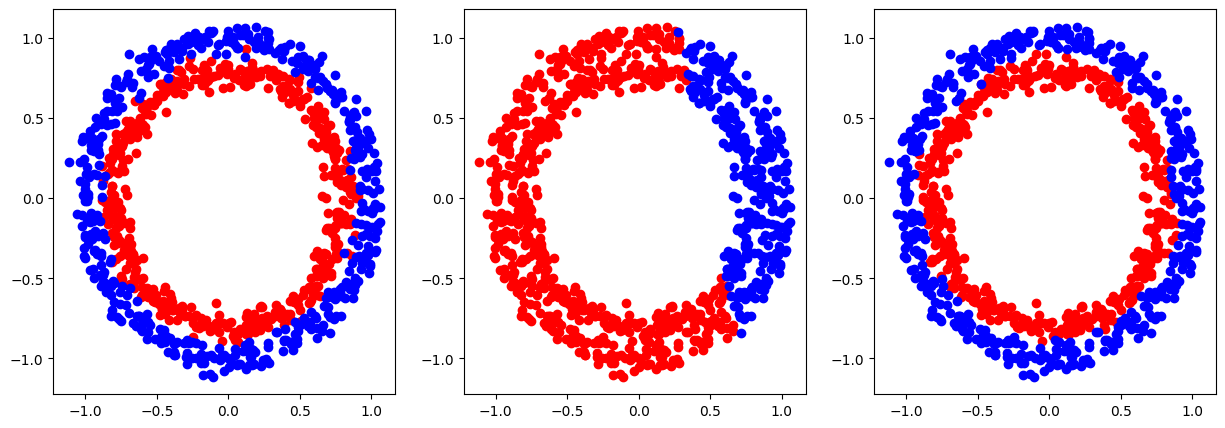

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3,  figsize=(15, 5))
for i in range(3):
  X_red = torch.masked_select(X[:,0], ys[i].bool())
  y_red = torch.masked_select(X[:,1], ys[i].bool())
  X_blue = torch.masked_select(X[:,0], ~ys[i].bool())
  y_blue = torch.masked_select(X[:,1], ~ys[i].bool())

  axs[i].scatter(X_red, y_red, color='red')
  axs[i].scatter(X_blue, y_blue, color='blue')
  axs[i];

<p class="task" id="5"></p>

5\. Используя реализацию полносвязного слоя из `torch.nn`, решите задачу регрессии. В качестве функции потерь используйте реализацию MSE из `torch.nn`. Для настройки весов реализуйте мини-пакетный градиентный спуск с использованием `torch.optim`. Перенесите вычисления на GPU и сравните время обучения с и без использования GPU. Решение должно корректно работать в случае отсутствия GPU без дополнительных изменений в коде.

- [ ] Проверено на семинаре

In [ ]:
from sklearn.datasets import make_regression
import torch as th

X, y, coef = make_regression(
    n_samples=10000,
    n_features=10,
    n_informative=6,
    coef=True,
    bias=0.5,
    random_state=42
)
X = th.FloatTensor(X)
y = th.FloatTensor(y).reshape(-1, 1)

In [ ]:
import torch.nn as nn
import torch.optim as optim

In [ ]:
model = nn.Sequential(
          nn.Linear(in_features=X.shape[1], out_features=10),
          nn.ReLU(),
          nn.Linear(in_features=10, out_features=1),
        )

In [ ]:
from torch.utils.data import DataLoader
dl = DataLoader(list(zip(X, y)), batch_size=10)

In [ ]:
%%time
n_epochs = 10
gamma = 0.001
crit = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=gamma)

for epoch in range(n_epochs):
  for (c, v) in dl:
    y_pred = model(c)
    loss = crit(y_pred, v)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

CPU times: user 8.45 s, sys: 290 ms, total: 8.74 s
Wall time: 9.13 s


In [ ]:
device = th.device(
    "cuda") if th.cuda.is_available() else th.device("cpu")
print(device)

cuda


In [ ]:
model_ = model.to(device)
X0 = X.to(device)
y0 = y.to(device)

In [ ]:
from torch.utils.data import DataLoader
dl = DataLoader(list(zip(X0, y0)), batch_size=10)

In [ ]:
%%time
n_epochs = 10
gamma = 0.001
crit = nn.MSELoss()
optimizer = optim.SGD(model_.parameters(), lr=gamma)

for epoch in range(n_epochs):
  for (c, v) in dl:
    y_pred = model_(c)
    loss = crit(y_pred, v)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

CPU times: user 9.97 s, sys: 294 ms, total: 10.3 s
Wall time: 10.9 s


<p class="task" id="6"></p>

6\. Используя `torch`, решите задачу классификации. Разделите данные на обучающую и валидационную выборку.  Для настройки весов реализуйте мини-пакетный градиентный спуск на основе данных обучающих выборки.

Используйте `tensorboard` для отслеживания процесса обучения модели. Для каждой эпохи оцените и сохраните среднее значение функции потерь по батчам (для обучающей выборки) и значение функции потерь для валидационной выборки. Визуализируйте граф вычислений модели. Добавьте визуализацию матрицы несоответствий (данную визуализацию можно сохранять не каждую эпоху, а с некоторой частотой) на валидационной выборке. Продемонстрируйте скриншоты интерфейса tensorboard с визуализациями.

- [ ] Проверено на семинаре

In [ ]:
import torch as th
import torch.nn as nn
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter

In [ ]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, noise=0.05, random_state=42)
X = th.FloatTensor(X)
y = th.LongTensor(y)

In [ ]:
X.shape

torch.Size([1000, 2])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
    )

In [ ]:
from torch.utils.data import DataLoader
dl = DataLoader(list(zip(X_train, y_train)), batch_size=10)

In [ ]:
model2 = nn.Sequential(
          nn.Linear(in_features=X.shape[1], out_features=10),
          nn.ReLU(),
          nn.Linear(in_features=10, out_features=2)
        )

In [ ]:
log_dir = "logs"
writer = SummaryWriter(log_dir=log_dir)

n_epochs = 50
gamma = 0.01
crit = nn.CrossEntropyLoss()
optimizer2 = optim.SGD(model2.parameters(), lr=gamma)
batch_size = 10
train_loss, test_loss = [], []
eval_frequency = 10

for epoch in range(n_epochs):
  L = 0
  total_batches = 0
  for (X_, y_) in dl:
    y_pred = model2(X_train)
    loss = crit(y_pred, y_train)
    loss.backward()
    optimizer2.step()
    optimizer2.zero_grad()
    total_batches += 1
    L += loss.item()
  avg_train_loss = L / total_batches
  writer.add_scalar('Loss/Train', avg_train_loss, epoch)
  y_pred_test = model2(X_test)
  L_ = crit(y_pred_test, y_test).item()
  writer.add_scalar('Loss/Validation', L_, epoch)

  if (epoch) % eval_frequency == 0:
        with th.no_grad():
            val_outputs = model2(X_train)
            _, val_preds = th.max(val_outputs, dim=1)
            writer.add_embedding(X_train, metadata=val_preds, global_step=epoch, tag='ValidationEmbedding')

writer.add_graph(model2, X_train)
writer.close()

In [ ]:
#%reload_ext tensorboard

In [ ]:
#%tensorboard --logdir logs

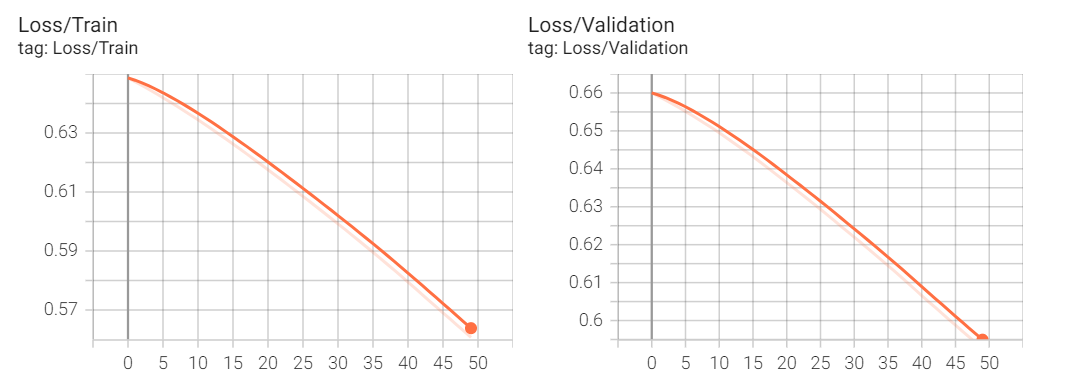

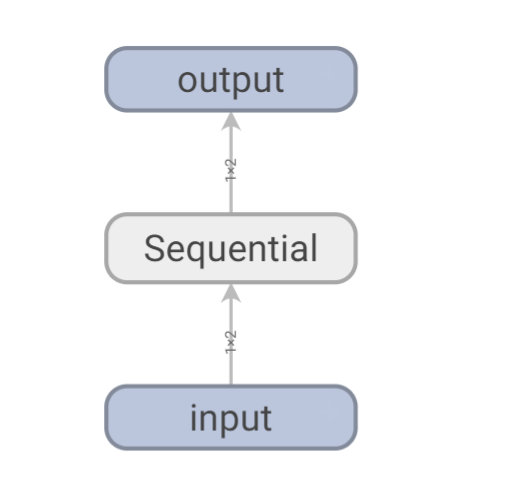

## Обратная связь
- [x] Хочу получить обратную связь по решению